# Profitable App Profiles for the App Store and Google Play Markets

This project is a part of the Dataquest guided project. I did a further analysis and visulization on my own. All the data I used can be found here Google Play(https://www.kaggle.com/lava18/google-play-store-apps) and App Store(https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps).

In this project, we seek to find mobile app profiles that are profitable in the App Store and Google Play. The majority of our revenue comes from in-app advertising, which is free to download and install. Therefore, our revenue from any given app is mainly determined by the number of users who download and use it. The purpose of this project is to analyze data to help our developers determine which types of app are more likely to attract users.

## Exploring the Data
The App Store has approximately 2 million iOS apps and Google Play has 2.1 million Android apps as of September 2018. In order to provide some insight into the future market, we will first analyze these two existing data sets and attempt to identify some patterns. 

We read the data and header seperately in order to understand the structure of the dataset.

In [1]:
from csv import reader

### The Google Play data set 
opened_file = open('googleplaystore.csv')
read_file = reader(opened_file)
android = list(read_file)
android_header = android[0]
android = android[1:]

### The App Store data set 
opened_file = open('AppleStore.csv')
read_file = reader(opened_file)
ios = list(read_file)
ios_header = ios[0]
ios = ios[1:]

In [2]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

print('------Apple-------')
print(ios_header)
explore_data(ios,0,1,True)
print('\n')
print('------Google-------')
print(android_header)
explore_data(android,0,1,True)

------Apple-------
['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']
['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


Number of rows: 7197
Number of columns: 16


------Google-------
['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13


## Data Cleaning - Deleting Wrong Data 

The Google Play data set has a dedicated discussion section, and we can see that one of the discussions outlines an error for row 10472. Let's print this row and compare it against the header and another row that is correct.

In [3]:
print(android_header)  # header
print('\n')
print('-----Wrong data-----')
print(android[10472])  # incorrect row
print('\n')
print('-----Correct data-----')
print(android[0])      # correct row

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


-----Wrong data-----
['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


-----Correct data-----
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


We can see from the row 10472 that the rating for the app Life Made WI-Fi Touchscreen Photo Frame is 19, which is clearly out of bounds as the maximum rating for an app on Google Play is 5. 

In [4]:
print(len(android))
del android[10472]  # don't run this more than once
print(len(android))

10841
10840


## Data Cleaning - Removing Duplicate Entries

### Part 1 

We discovered that there are many duplicate data records that should be removed. We do not want to include the duplicate data to bias our analysis. Below, we first explore the difference between duplicate data and show the example of "Instagram".

In [5]:
for app in android:
    name = app[0]
    if name == 'Instagram':
        print(app)
print('\n')
        
for app in ios:
    name = app[1]
    if name == 'VR Roller Coaster':
        print(app)
print(ios_header)


['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


['952877179', 'VR Roller Coaster', '169523200', 'USD', '0.0', '107', '102', '3.5', '3.5', '2.0.0', '4+', 'Games', '37', '5', '1', '1']
['1089824278', 'VR Roller Coaster', '240964608', 'USD', '0.0', '67', '44', '3.5', '4.0', '0.81', '4+', 'Games', '38', '0', '1', '1']
['id', 'track_name', 'size_byt

If you examine the rows we printed for the Instagram app, the main difference happens on the fourth position of each row, which corresponds to the number of reviews. The different numbers show that the data was collected at different times. We can use this to build a criterion for keeping rows. We won't remove rows randomly, but rather we'll keep the rows that have the highest number of reviews because the higher the number of reviews, the more reliable the ratings.

To do that, we will:

* Create a dictionary where each key is a unique app name, and the value is the highest number of reviews of that app
* Use the dictionary to create a new data set, which will have only one entry per app (and we only select the apps with the highest number of reviews)

In [6]:
duplicate_apps = []
unique_apps = []

for app in android:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
    
print('-----Android-----')
print('Number of duplicate apps:', len(duplicate_apps))
print('\n')
print('Examples of duplicate apps:', duplicate_apps[:5])
print('\n')

duplicate_apps_ios = []
unique_apps_ios = []

for app in ios:
    name = app[1]
    if name in unique_apps_ios:
        duplicate_apps_ios.append(name)
    else:
        unique_apps_ios.append(name)

print('-----ios-----')
print('Number of duplicate apps:', len(duplicate_apps_ios))
print('\n')
print('Examples of duplicate apps:', duplicate_apps_ios[:5])

-----Android-----
Number of duplicate apps: 1181


Examples of duplicate apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings']


-----ios-----
Number of duplicate apps: 2


Examples of duplicate apps: ['Mannequin Challenge', 'VR Roller Coaster']


### Part 2 - Android

Now, let's use the reviews_max dictionary to remove the duplicates. For the duplicate cases, we'll only keep the entries with the highest number of reviews. In the code cell below:

* We start by initializing two empty lists, android_clean and already_added.
* We loop through the android data set, and for every iteration:
   * We isolate the name of the app and the number of reviews.
   * We add the current row (app) to the android_clean list, and the app name (name) to the already_added list if:
      * The number of reviews of the current app matches the number of reviews of that app as described in the reviews_max dictionary; and
      * The name of the app is not already in the already_added list. We need to add this supplementary condition to account for those cases where the highest number of reviews of a duplicate app is the same for more than one entry (for example, the Box app has three entries, and the number of reviews is the same). If we just check for reviews_max[name] == n_reviews, we'll still end up with duplicate entries for some apps.

In [7]:
reviews_max = {}

for app in android:
    name = app[0]
    n_reviews = float(app[3])
    
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
        
    elif name not in reviews_max:
        reviews_max[name] = n_reviews
        
print('Expected length:', len(android) - 1181)
print('Actual length:', len(reviews_max))

Expected length: 9659
Actual length: 9659


In [8]:
android_clean = []
already_added = []

for app in android:
    name = app[0]
    n_reviews = float(app[3])
    
    if (reviews_max[name] == n_reviews) and (name not in already_added):
        android_clean.append(app)
        already_added.append(name) 

In [9]:
explore_data(android_clean,0,1,True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


Number of rows: 9659
Number of columns: 13


### Part 2 - ios

We implement the same routine to ios. 

In [10]:
reviews_max = {}

for app in ios:
    name = app[1]
    n_reviews = float(app[5])
    
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
        
    elif name not in reviews_max:
        reviews_max[name] = n_reviews
        
print('Expected length:', len(ios) - 2)
print('Actual length:', len(reviews_max))

ios_clean = []
ios_already_added = []

for app in ios:
    name = app[1]
    n_reviews = float(app[5])
    
    if (reviews_max[name] == n_reviews) and (name not in ios_already_added):
        ios_clean.append(app)
        ios_already_added.append(name) 
        
explore_data(ios_clean,0,1,True)

Expected length: 7195
Actual length: 7195
['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


Number of rows: 7195
Number of columns: 16


## Data Cleaning - Removing Non-English Apps

We're not interested in keeping those non-english kind of apps, so we'll remove them. One way to go about this is to remove each app whose name contains a symbol that is not commonly used in English text — English text usually includes letters from the English alphabet, numbers composed of digits from 0 to 9, punctuation marks (., !, ?, ;, etc.), and other symbols (+, *, /, etc.).

All these characters that are specific to English texts are encoded using the ASCII standard. Each ASCII character has a corresponding number between 0 and 127 associated with it, and we can take advantage of that to build a function that checks an app name and tells us whether it contains non-ASCII characters.

We built this function below, and we use the built-in ord() function to find out the corresponding encoding number of each character.

In [11]:
def check_english(string):
    
    for character in string:
        if ord(character) > 127:
            return False
    
    return True

print(check_english('Instagram'))
print(check_english('爱奇艺PPSA'))
print(check_english('Docs To Go™ Free Office Suite'))
print(check_english('Instachat 😜'))

True
False
False
False


However, this function will also return False for those English app with specific character. In order to minimize the impact of data loss, we'll only remove an app if its name has more than three non-ASCII characters:

In [12]:
def check_english(string):
    non_ascii = 0
    
    for character in string:
        if ord(character) > 127:
            non_ascii += 1
    
    if non_ascii > 3:
        return False
    else:
        return True
    
print(check_english('Docs To Go™ Free Office Suite'))
print(check_english('Instachat 😜'))

True
True


In [72]:
android_english = []
ios_english = []

for app in android_clean:
    name = app[0]
    if check_english(name):
        android_english.append(app)
        
for app in ios_clean:
    name = app[1]
    if check_english(name):
        ios_english.append(app)

print('-----Android-----')
explore_data(android_english, 0, 0, True)
print('\n')
print('-------ios-------')
explore_data(ios_english, 0, 0, True)

-----Android-----
Number of rows: 9614
Number of columns: 13


-------ios-------
Number of rows: 6181
Number of columns: 16


## Data Cleaning - Isolating the Free Apps

We are only interested in free app. We will need to isolate only the free apps for our analysis. Below, we isolate the free apps for both two data sets.

In [76]:
android_final = []
ios_final = []

for app in android_english:
    price = app[7]
    if price == '0':
        android_final.append(app)
        
for app in ios_english:
    price = app[4]
    if price == '0.0':
        ios_final.append(app)
        
print('Final number of android app: ', len(android_final))
print('Final number of ios app:     ', len(ios_final))

Final number of android app:  8864
Final number of ios app:      3220


After cleaning up the datasets, We're left with 8864 Android apps and 3222 iOS apps, which should be enough for our analysis.

## Most Common Apps by Genre

To minimize risks and overhead, our validation strategy for an app idea has three steps:

1. Build a minimal Android version of the app, and add it to Google Play.
2. If the app has a good response from users, we develop it further.
3. If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

In [59]:
def freq_table(dataset, index):
    table = {}
    total = 0
    
    for row in dataset:
        total += 1
        value = row[index]
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
    
    table_percentages = {}
    for key in table:
        percentage = (table[key] / total) * 100
        table_percentages[key] = percentage 
    
    return table_percentages


def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
        
    table_sorted = sorted(table_display, reverse = True)
    print('Index : Percentage') 
    print('============================')
    for entry in table_sorted:
        print(entry[1], ':', entry[0]) 

In [60]:
display_table(android_final, 1) #Category

Index : Percentage
FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.395758122743682
PERSONALIZATION : 3.3167870036101084
COMMUNICATION : 3.2378158844765346
HEALTH_AND_FITNESS : 3.0798736462093865
PHOTOGRAPHY : 2.944494584837545
NEWS_AND_MAGAZINES : 2.7978339350180503
SOCIAL : 2.6624548736462095
TRAVEL_AND_LOCAL : 2.33528880866426
SHOPPING : 2.2450361010830324
BOOKS_AND_REFERENCE : 2.1435018050541514
DATING : 1.861462093862816
VIDEO_PLAYERS : 1.7937725631768955
MAPS_AND_NAVIGATION : 1.3989169675090252
FOOD_AND_DRINK : 1.2409747292418771
EDUCATION : 1.1620036101083033
ENTERTAINMENT : 0.9589350180505415
LIBRARIES_AND_DEMO : 0.9363718411552346
AUTO_AND_VEHICLES : 0.9250902527075812
HOUSE_AND_HOME : 0.8235559566787004
WEATHER : 0.8009927797833934
EVENTS : 0.7107400722021661
PARENTING : 0.654332129963898

We can see a pretty balanced distribution among different types of categories.

In [61]:
display_table(android_final, -4) #Genres

Index : Percentage
Tools : 8.449909747292418
Entertainment : 6.069494584837545
Education : 5.347472924187725
Business : 4.591606498194946
Productivity : 3.892148014440433
Lifestyle : 3.892148014440433
Finance : 3.7003610108303246
Medical : 3.531137184115524
Sports : 3.463447653429603
Personalization : 3.3167870036101084
Communication : 3.2378158844765346
Action : 3.1024368231046933
Health & Fitness : 3.0798736462093865
Photography : 2.944494584837545
News & Magazines : 2.7978339350180503
Social : 2.6624548736462095
Travel & Local : 2.3240072202166067
Shopping : 2.2450361010830324
Books & Reference : 2.1435018050541514
Simulation : 2.0419675090252705
Dating : 1.861462093862816
Arcade : 1.8501805054151623
Video Players & Editors : 1.7712093862815883
Casual : 1.7599277978339352
Maps & Navigation : 1.3989169675090252
Food & Drink : 1.2409747292418771
Puzzle : 1.128158844765343
Racing : 0.9927797833935018
Role Playing : 0.9363718411552346
Libraries & Demo : 0.9363718411552346
Auto & Vehicle

It is not clear what the difference is between the Genres column and the Category column, but we note that the Genres column is much more detailed (it contains more subcategories). Currently, we are only focusing on the big picture, so we will only work with the Category column.



In [62]:
display_table(ios_final, -5) #prime_genre

Index : Percentage
Games : 58.13664596273293
Entertainment : 7.888198757763975
Photo & Video : 4.968944099378882
Education : 3.6645962732919255
Social Networking : 3.291925465838509
Shopping : 2.608695652173913
Utilities : 2.515527950310559
Sports : 2.142857142857143
Music : 2.049689440993789
Health & Fitness : 2.018633540372671
Productivity : 1.7391304347826086
Lifestyle : 1.5838509316770186
News : 1.3354037267080745
Travel : 1.2422360248447204
Finance : 1.1180124223602486
Weather : 0.8695652173913043
Food & Drink : 0.8074534161490683
Reference : 0.5590062111801243
Business : 0.5279503105590062
Book : 0.43478260869565216
Navigation : 0.18633540372670807
Medical : 0.18633540372670807
Catalogs : 0.12422360248447205


There are more than half (58.16%) of free English apps that are games. Nearly 8% of apps are entertainment-related, followed by photo and video apps, which are close to 5%. We found that only 3.66% of these apps were intended for educational purposes, followed by social networking apps, which accounted for 3.29% of the apps in our dataset.

AppStore (at least in the free English section) is generally perceived as being dominated by apps that are intended for entertainment purposes (games, entertainment, photo and video, social networking, sports, music, etc.) while apps that serve practical purposes are more rare (education, shopping, utilities, productivity, lifestyle, etc.). The fact that fun apps are the most numerous does not necessarily mean that they are the most popular - the demand may not be the same as the supply.

## Most Popular Apps by Genre on the App Store

Text(0.5, 0, 'Average Number of Rating Count')

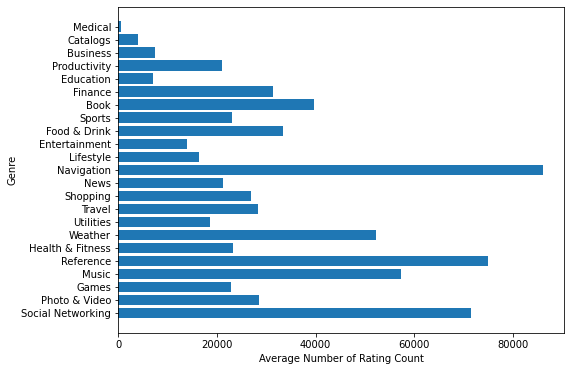

In [49]:
import matplotlib.pyplot as plt
genres_ios = freq_table(ios_final, -5)
length = len(genres_ios)
avg_n_ratings=[]
for genre in genres_ios:
    total = 0
    len_genre = 0
    for app in ios_final:
        genre_app = app[-5]
        if genre_app == genre:            
            n_ratings = float(app[5])
            total += n_ratings
            len_genre += 1
    avg_n_ratings.append(total / len_genre)

# Data Visualization
fig, ax = plt.subplots(figsize = (8,6))
ax.barh(range(length), avg_n_ratings)
ax.set_yticks(range(length))
ax.set_yticklabels(genres_ios)
ax.set_ylabel('Genre')
ax.set_xlabel('Average Number of Rating Count')

In [52]:
print('---------------Navigation--------------')
for app in ios_final:
    if app[-5] == 'Navigation':
        print(app[1], ':', app[5]) # print name and number of ratings

---------------Navigation--------------
Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


In [51]:
print('---------------Reference---------------')
for app in ios_final:
    if app[-5] == 'Reference':
        print(app[1], ':', app[5]) # print name and number of ratings

---------------Reference---------------
Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
教えて!goo : 0
Jishokun-Japanese English Dictionary & Translator : 0


In [53]:
print('-----------Social Networking-----------')
for app in ios_final:
    if app[-5] == 'Social Networking':
        print(app[1], ':', app[5]) # print name and number of ratings

-----------Social Networking-----------
Facebook : 2974676
Pinterest : 1061624
Skype for iPhone : 373519
Messenger : 351466
Tumblr : 334293
WhatsApp Messenger : 287589
Kik : 260965
ooVoo – Free Video Call, Text and Voice : 177501
TextNow - Unlimited Text + Calls : 164963
Viber Messenger – Text & Call : 164249
Followers - Social Analytics For Instagram : 112778
MeetMe - Chat and Meet New People : 97072
We Heart It - Fashion, wallpapers, quotes, tattoos : 90414
InsTrack for Instagram - Analytics Plus More : 85535
Tango - Free Video Call, Voice and Chat : 75412
LinkedIn : 71856
Match™ - #1 Dating App. : 60659
Skype for iPad : 60163
POF - Best Dating App for Conversations : 52642
Timehop : 49510
Find My Family, Friends & iPhone - Life360 Locator : 43877
Whisper - Share, Express, Meet : 39819
Hangouts : 36404
LINE PLAY - Your Avatar World : 34677
WeChat : 34584
Badoo - Meet New People, Chat, Socialize. : 34428
Followers + for Instagram - Follower Analytics : 28633
GroupMe : 28260
Marco Polo

We look into the detail of top 3 geners: Navigation, Reference, and Social Networking. In the case of Navigation and Reference, we can observe the number are actually boost up by those specific app like Waze, Google map, and Bible. This can be improved by removing the most popular apps for each genre and recalculating the averages, but we will leave the level of detail until a later stage.

## Most Popular Apps by Category on Google Play

We have actual data about the number of downloads on the Google Play market, so we should be able to get a better understanding of the popularity of different categories. However, the tally of install numbers does not seem precise enough - the values are all open-ended (100+, 1,000+, 5,000+, etc.):

In [63]:
display_table(android_final, 5) # the Installs columns

Index : Percentage
1,000,000+ : 15.726534296028879
100,000+ : 11.552346570397113
10,000,000+ : 10.548285198555957
10,000+ : 10.198555956678701
1,000+ : 8.393501805054152
100+ : 6.915613718411552
5,000,000+ : 6.825361010830325
500,000+ : 5.561823104693141
50,000+ : 4.7721119133574
5,000+ : 4.512635379061372
10+ : 3.5424187725631766
500+ : 3.2490974729241873
50,000,000+ : 2.3014440433213
100,000,000+ : 2.1322202166064983
50+ : 1.917870036101083
5+ : 0.78971119133574
1+ : 0.5076714801444043
500,000,000+ : 0.2707581227436823
1,000,000,000+ : 0.22563176895306858
0+ : 0.04512635379061372
0 : 0.01128158844765343


This data has the disadvantage that it is not precise. For instance, we do not know whether an app with 100,000+ downloads has 100,000 or 350,000 downloads. Our purpose does not require very precise data - we simply wish to get a sense of which genres of apps attract the most users; we do not require high precision with respect to the numbers of users. We'll leave the numbers as they are, which means that an app with 100,000+ installs is considered to have 100,000 installs, and an app with 1,000,000+ installs is considered to have 1,000,000 installs, and so on.

Text(0.5, 0, 'Average Number of Install')

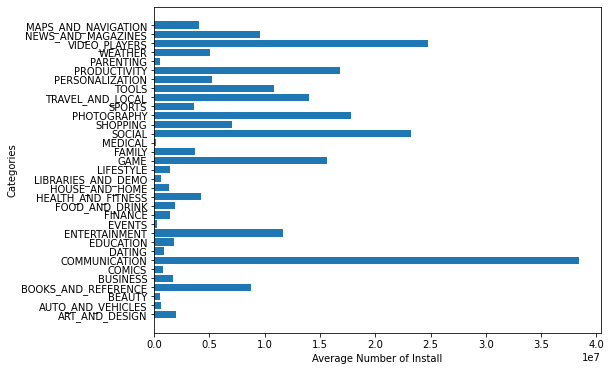

In [70]:
categories_android = freq_table(android_final, 1)
length=len(categories_android)
avg_n_installs=[]
for category in categories_android:
    total = 0
    len_category = 0
    for app in android_final:
        category_app = app[1]
        if category_app == category:            
            n_installs = app[5]
            n_installs = n_installs.replace(',', '')
            n_installs = n_installs.replace('+', '')
            total += float(n_installs)
            len_category += 1
    avg_n_installs.append(total / len_category)
    #print(category, ':', avg_n_installs)
    
fig, ax = plt.subplots(figsize = (8,6))
ax.barh(range(length), avg_n_installs)
ax.set_yticks(range(length))
ax.set_yticklabels(categories_android)
ax.set_ylabel('Categories')
ax.set_xlabel('Average Number of Install')

Communication apps has the highest average number of installs: 38,456,119. This number is significantly influenced by a few apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts).

In [71]:
for app in android_final:
    if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+'
                                      or app[5] == '500,000,000+'
                                      or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

From these analysis, we could see that those top categories or geners (Social media, navigation, communication etc.) are dominated by a few giants who are hard to compete against. In order to give a more realistic suggestion, we set our target to "Photography" and "Book and Reference". These kind of app might have a  less influence from "brand loyalty". As long as ours app is more easy to operate or has some unique features, customers are easy to download a new one. Also, "Photography" and "Book and Reference" have a fairly high install number which are 1,000,000+ and 500,000+, respectively. Our next step will be to examine these two categories in more detail.   

Text(0, 0.5, 'Number of Install')

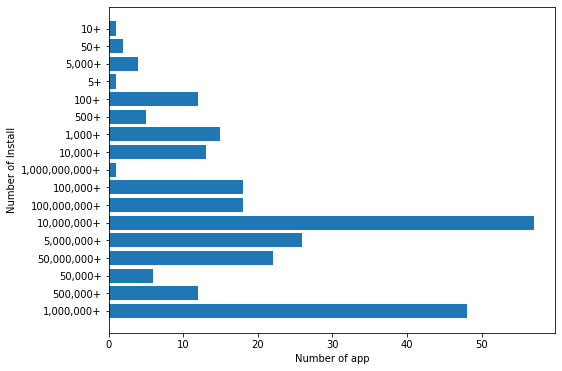

In [122]:
count_table={}
for app in android_final:
    if app[1] == 'PHOTOGRAPHY' :
        #print(app[0], ':', app[5])
        if app[5] in count_table:
            count_table[app[5]]+=1
        else:
            count_table[app[5]]=1
length=len(count_table)
fig, ax = plt.subplots(figsize = (8,6))
ax.barh(range(length), list(count_table.values()))
ax.set_yticks(range(length))
ax.set_yticklabels(list(count_table.keys()))
ax.set_xlabel('Number of app')
ax.set_ylabel('Number of Install')

From the figure, we can see that there are more than 50 popular app (number of install > 10 million) on the market. This might suggest a saturated market and existing dominant apps. It might not be a good idea to start from.  

In [96]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '100,000,000+'
                                      or app[5] == '50,000,000+'
                                      or app[5] == '10,000,000+'):
        print(app[0], ':', app[5])

Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
FBReader: Favorite Book Reader : 10,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Aldiko Book Reader : 10,000,000+
Wattpad 📖 Free Books : 100,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Quran for Android : 10,000,000+
Audiobooks from Audible : 100,000,000+
Dictionary.com: Find Definitions for English Words : 10,000,000+
English Dictionary - Offline : 10,000,000+
NOOK: Read eBooks & Magazines : 10,000,000+
Dictionary : 10,000,000+
Spanish English Translator : 10,000,000+
Dictionary - Merriam-Webster : 10,000,000+
JW Library : 10,000,000+
Oxford Dictionary of English : Free : 10,000,000+
English Hindi Dictionary : 10,000,000+


Text(0, 0.5, 'Number of Install')

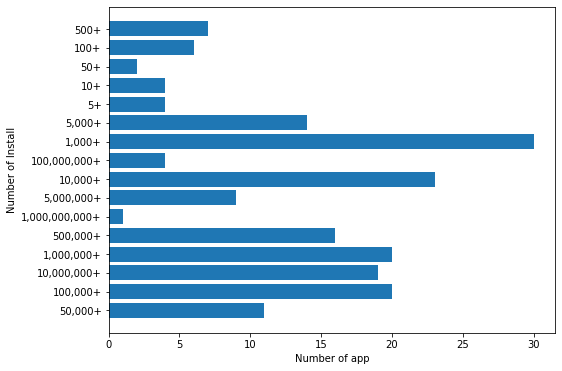

In [124]:
count_table={}
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE':
        if app[5] in count_table:
            count_table[app[5]]+=1
        else:
            count_table[app[5]]=1
length=len(count_table)
fig, ax = plt.subplots(figsize = (8,6))
ax.barh(range(length), list(count_table.values()))
ax.set_yticks(range(length))
ax.set_yticklabels(list(count_table.keys()))
ax.set_xlabel('Number of app')
ax.set_ylabel('Number of Install')

On the other hand, we can see that "BOOKS_AND_REFERENCE" has a small number (<10) of extremely popular app (number of install > 10 million). This market still shows potential. We are going to look into detail and try to get some app ideas based on the kind of apps that are somewhere in the middle in terms of popularity (between 1,000,000 and 100,000,000 downloads): 

In [125]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000+'
                                            or app[5] == '5,000,000+'
                                            or app[5] == '10,000,000+'
                                            or app[5] == '50,000,000+'):
        print(app[0], ':', app[5])

Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
AlReader -any text book reader : 5,000,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
ReadEra – free ebook reader : 1,000,000+
Ebook Reader : 5,000,000+
Read books online : 5,000,000+
eBoox: book reader fb2 epub zip : 1,000,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
English-Myanmar Dictionary : 1,000,000+
Golden Dictionary (EN-AR) : 1,000,000+
All Language Translator Free : 1,000,000+
Aldiko Book Reader : 10,000,000+
Dictionary - WordWeb : 5,000,000+
50000 Free eBooks & Free AudioBooks : 5,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Al Quran Al karim : 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+
Koran Read &MP3 30 Juz Offline : 1,000,000+
H

It appears that this class is dominated by applications that process and read ebooks, as well as libraries and dictionaries of various types. Because of this, building similar applications is probably not a wise move because there will be significant competition.

A ebook version of classic, famous, or most recent novels or poetry might be a good starting point since we can see that quite a few apps built around the book Quran with fairly good number of install. However, we should also introduce some new feature in our app to attract people to use. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a discussion forum for the book, etc. Also some basic feature like light or dark theme or even customize option should definitely be included. 

We can cooperate with movie still photography, which would be a unique advertising feature for some famous novel series like Twlight.  

## Conclusions
In this project, we examined data from the App Store and Google Play in order to develop a mobile app profile that will be profitable on both markets.

We concluded that turning a popular book (perhaps a more recent book) into an app could prove to be profitable for both the Google Play and App Store markets. Since there are already a large number of libraries available on the markets, we must add some additional features to the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a discussion forum for the book, etc. Also some basic feature like light or dark theme or even customize option should definitely be included. 

We can cooperate with movie still photography, which would be a unique advertising feature for some famous novel series like Twlight.  